In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('netflix_users.csv')

In [8]:
df.head()
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [34]:
df.describe()
df['Last_Login']=pd.to_datetime(df['Last_Login'])

In [6]:
df.Name.value_counts()
df.groupby("Name")["Age"].mean()

Name
Alex Brown        44.891051
Alex Davis        45.230126
Alex Garcia       47.448669
Alex Hernandez    43.764045
Alex Johnson      48.083333
                    ...    
Sarah Jones       47.019920
Sarah Martinez    44.223938
Sarah Miller      45.665289
Sarah Smith       44.042918
Sarah Williams    46.022388
Name: Age, Length: 100, dtype: float64

In [12]:
Country_Watch_avreige=df.groupby("Country")['Watch_Time_Hours'].mean()

In [13]:
Country_Watch_avreige

Country
Australia    508.207136
Brazil       503.951806
Canada       511.423241
France       506.039248
Germany      494.568272
India        492.242523
Japan        494.820716
Mexico       496.487858
UK           496.065073
USA          501.357591
Name: Watch_Time_Hours, dtype: float64

In [38]:
df.head(3)


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24


In [17]:
Subscription_Watch_Time_Hours=df.groupby("Subscription_Type")["Watch_Time_Hours"].mean()

In [18]:
Subscription_Watch_Time_Hours

Subscription_Type
Basic       502.994617
Premium     501.409387
Standard    496.949376
Name: Watch_Time_Hours, dtype: float64

In [21]:
Avrage_Subscription_Age=df.groupby("Subscription_Type")["Age"].mean()

In [22]:
Avrage_Subscription_Age

Subscription_Type
Basic       46.349689
Premium     46.557962
Standard    46.541373
Name: Age, dtype: float64

In [28]:
Favorite_Genre_Watch_hours=df.groupby("Favorite_Genre")["Watch_Time_Hours"].mean().sort_values(ascending=False)

In [29]:
Favorite_Genre_Watch_hours

Favorite_Genre
Romance        506.899950
Drama          504.482423
Comedy         501.868756
Documentary    500.694868
Action         498.495163
Sci-Fi         496.379340
Horror         494.517649
Name: Watch_Time_Hours, dtype: float64

In [41]:
Last_Login_Country=df.groupby("Country")['Last_Login'].max()
    


C:\Users\harhash\AppData\Local\Temp\ipykernel_17152\2351279576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription_Type', data=df, palette='viridis')


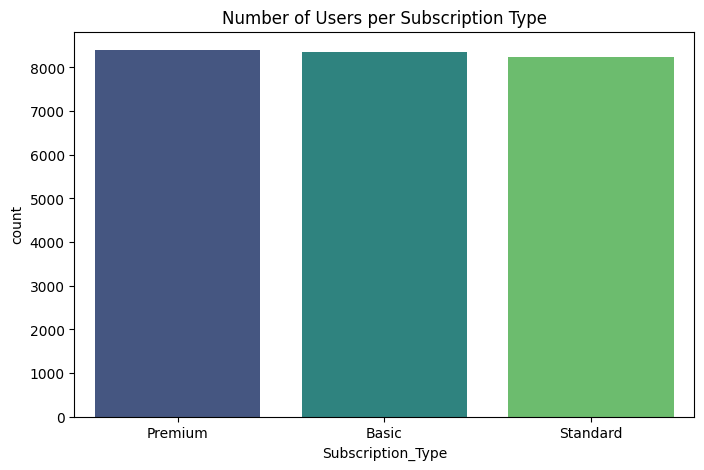

In [74]:
# 1. توزيع أنواع الاشتراكات (Pie Chart or Countplot)
plt.figure(figsize=(8,5))
sns.countplot(x='Subscription_Type', data=df, palette='viridis')
plt.title('Number of Users per Subscription Type')
plt.show()


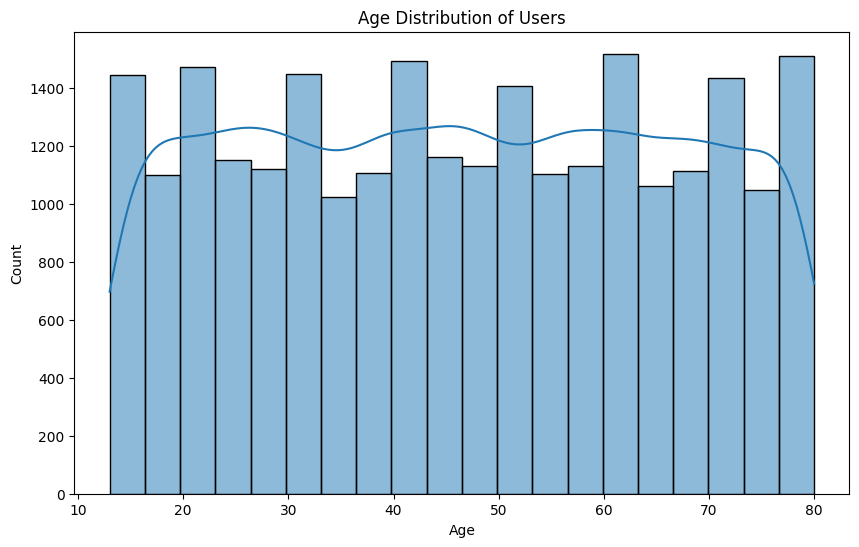

In [75]:

# 2. توزيع الأعمار (Histogram)
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.show()

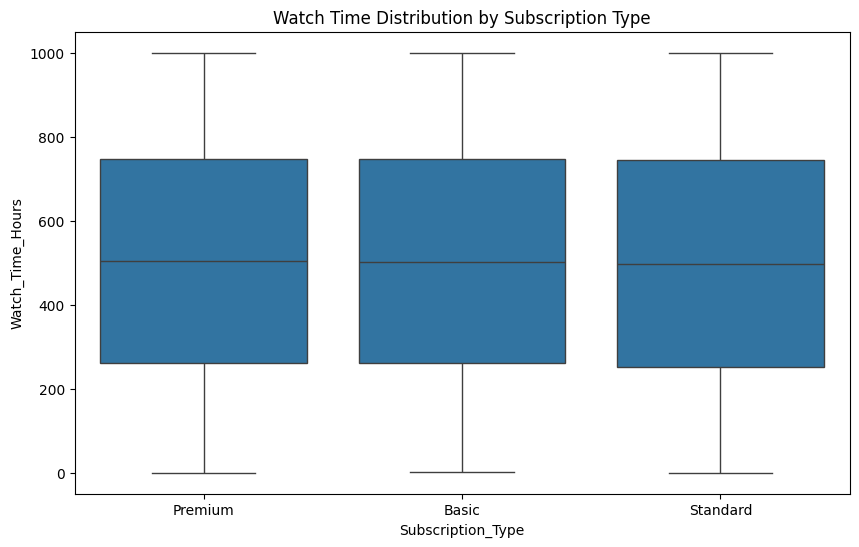

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Subscription_Type', y='Watch_Time_Hours', data=df)
plt.title('Watch Time Distribution by Subscription Type')
plt.show()

In [67]:
country_genre = pd.crosstab(df['Country'], df['Favorite_Genre'])

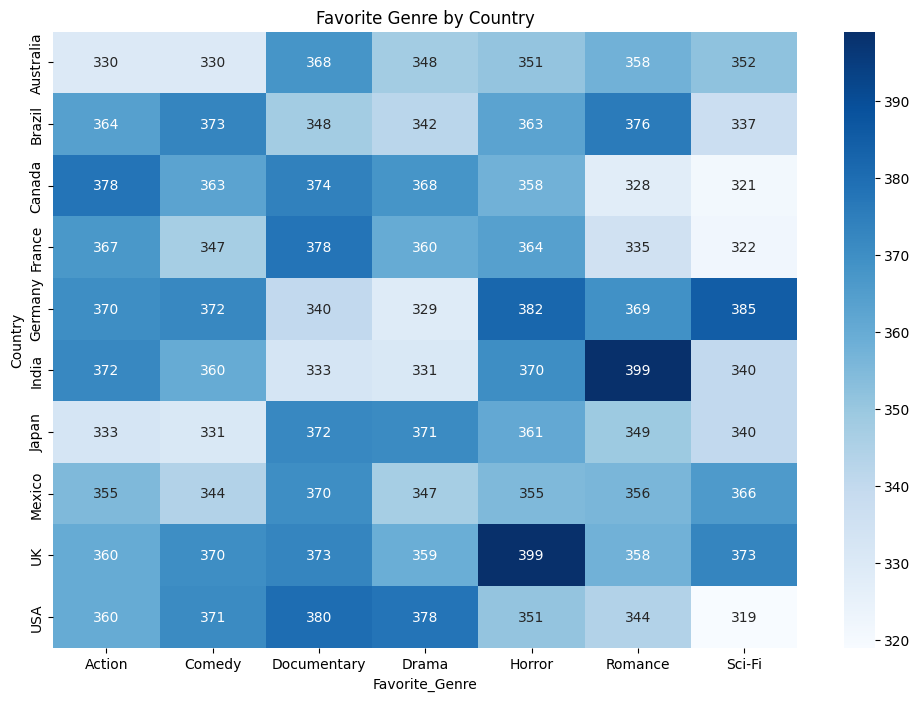

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(country_genre, annot=True, fmt='d', cmap='Blues')
plt.title('Favorite Genre by Country')
plt.show()

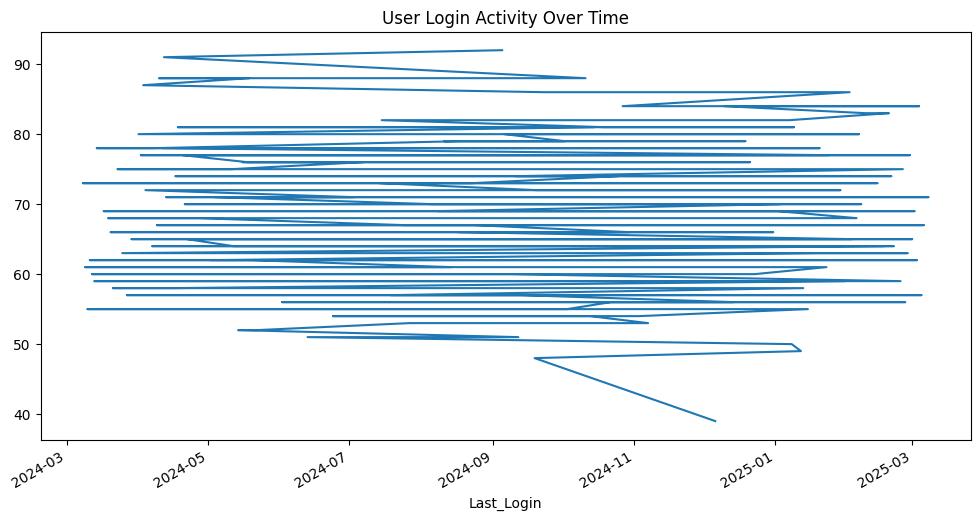

In [70]:
# استخراج الشهر والسنة
df['Login_Month'] = df['Last_Login'].dt.month_name()
df['Login_Year'] = df['Last_Login'].dt.year

# متى كان آخر دخول للمستخدمين (نشاط الموقع)
plt.figure(figsize=(12,6))
df['Last_Login'].value_counts().plot(kind='line') # أو تجميعها بالشهور
plt.title('User Login Activity Over Time')
plt.show()

In [71]:
# مثال: أكثر 5 مستخدمين مشاهدة
top_users = df.nlargest(5, 'Watch_Time_Hours')[['Name', 'Country', 'Watch_Time_Hours']]
print(top_users)

                 Name    Country  Watch_Time_Hours
3940      Chris Brown     Canada            999.99
21372   Chris Johnson     Brazil            999.96
23705    Chris Miller     Brazil            999.87
11588  Chris Martinez    Germany            999.75
6406    Alex Martinez  Australia            999.73


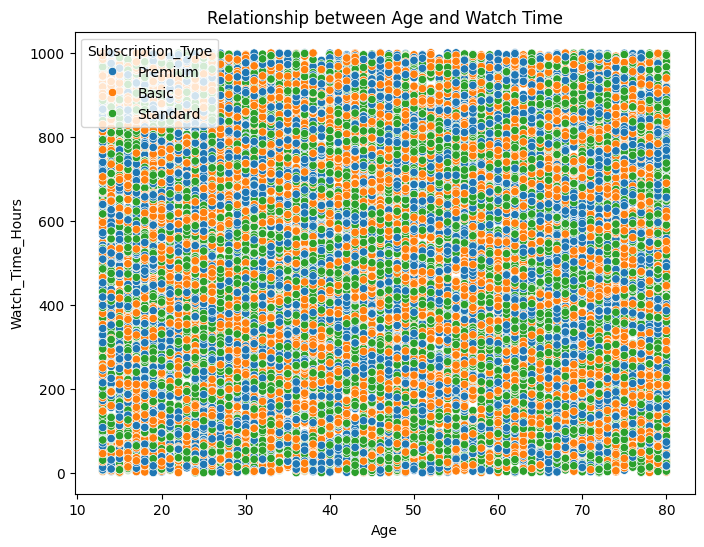

                       Age  Watch_Time_Hours
Age               1.000000          0.007981
Watch_Time_Hours  0.007981          1.000000


In [72]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Watch_Time_Hours', data=df, hue='Subscription_Type')
plt.title('Relationship between Age and Watch Time')
plt.show()

# حساب معامل الارتباط
print(df[['Age', 'Watch_Time_Hours']].corr())

<Figure size 640x480 with 0 Axes>

ImportError: `Import tabulate` failed.  Use pip or conda to install the tabulate package.